# Multiple Linear Regression

## Importing the libraries

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [110]:
dataset = pd.read_csv("50_Startups.csv")

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

## Encoding categorical data

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct  = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder="passthrough")
X = np.array(ct.fit_transform(X))


## Splitting the dataset into the Training set and Test set

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [113]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

## Predicting the Test set results

In [114]:
Y_pred = np.array(regressor.predict(X_test))

np.set_printoptions(precision=2)

print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), axis=1 ))

[[112826.37 103282.38]
 [134284.79 144259.4 ]
 [145684.79 146121.95]
 [ 79167.99  77798.83]
 [192938.02 191050.39]
 [110167.01 105008.31]
 [ 62746.73  81229.06]
 [ 98520.78  97483.56]
 [121253.52 110352.25]
 [182539.06 166187.94]
 [104141.92  96778.92]
 [ 85891.75  96479.51]
 [121258.12 105733.54]
 [ 85512.38  96712.8 ]
 [137058.23 124266.9 ]
 [171649.31 155752.6 ]
 [161928.02 132602.65]
 [ 44255.49  64926.08]
 [ 43904.62  35673.41]
 [102641.48 101004.64]
 [147418.26 129917.04]
 [109083.58  99937.59]
 [ 99570.89  97427.84]
 [114122.62 126992.93]
 [ 64794.37  71498.49]]


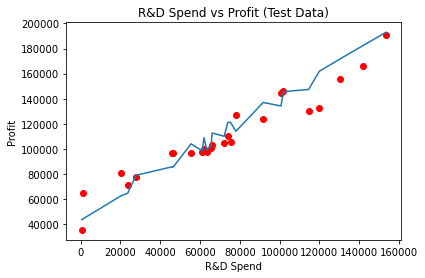

In [121]:
featureIndex = 3
plt.scatter(X_test[:,featureIndex], Y_test, color="red")
plt.plot(np.sort(X_test[:,featureIndex]), regressor.predict(X_test[X_test[:,featureIndex].argsort()]))
plt.title(dataset.columns[featureIndex-3] + " vs Profit (Test Data)")
plt.xlabel(dataset.columns[featureIndex-3])
plt.ylabel("Profit")
plt.show()